In [1]:
import matplotlib
%matplotlib inline

import numpy as np
import PreFRBLE
from PreFRBLE.convenience import *
from PreFRBLE.plot import *
from PreFRBLE.likelihood import *
from PreFRBLE.physics import *


### Repeating FRBs
Here we list and investigate those FRBs seen to repeat (not developed yet)

In [42]:
repeaters = { # name : [DM, DM_NE2001, DM_YMW16, RM, z, telescope]
    "FRB121102": [558,188,None,100000,0.19,"ARECIBO"], ## 1701.01100
    "FRB180814": [189,87,100,None,None,"CHIME"],  ## 1901.04525
#    "FRB180916": [349,200,330,None,None,"CHIME"], ## 1908.03507 and on
    "FRB181030": [103,40,32,None,None,"CHIME"],
    "FRB181128": [450,110,150,None,None,"CHIME"],
    "FRB181119": [364,34,26,None,None,"CHIME"],
    "FRB190116": [441,20,20,None,None,"CHIME"],
    "FRB181017a": [1282,43,37,None,None,"CHIME"],
    "FRB190209": [425,46,39,None,None,"CHIME"],
    "FRB190222": [461,87,100,None,None,"CHIME"], 
    "FRB190208": [580,72,66,None,None,"CHIME"], ## 2001.03595
    "FRB190604": [553,32,24,20,None,"CHIME"],
    "FRB181017b": [302,40,44,None,None,"CHIME"],
    "FRB180908": [196,38,31,None,None,"CHIME"],
    "FRB190117": [394,48,40,None,None,"CHIME"],
    "FRB190110": [222,29,22,500,None,"CHIME"],
    "FRB190417": [1378,78,80,None,None,"CHIME"],
    "FRB190212": [651,43,34,None,None,"CHIME"],
    "FRB190907": [310,53,51,None,None,"CHIME"],
    "FRB180916": [349,199,325,115,0.0337,"CHIME"],## data from FRBcat, 2001.02222 observed to repeat by EVN
}

In [43]:
len(repeaters)

19

In [21]:

def PlotRedshiftEstimate( DM, redshift_host=None, telescope='CHIME', scenario={}, ax=None ):
    ## P(z|DM)*pi(z) with additional estimated z-Marker
    print(DM)
    if ax is None:
        fig, ax = plt.subplots()
    for population, linestyle in zip( populations, linestyles_population ):
        Ps, z = LikelihoodRedshift( DMs=[DM], population=population, telescope=telescope, scenario=scenario )
        PlotLikelihood(x=z, P=Ps[0], measure='z', linestyle=linestyle, ax=ax, density=False)
        est, dev = Likelihood2Expectation( x=z, P=Ps[0], log=False, density=True )
        ax.errorbar( est, 1e-2, xerr=dev, marker='+', markersize=16, markeredgewidth=2 )
    
    ax.set_title('obtain estimate')
    ax.set_xscale('linear')
    if redshift_host is not None:
        ax.plot( redshift_host, 1e-2, marker='x', markersize=16, markeredgewidth=2 )
    ax.set_xlim(0,1)
    ax.set_ylim(2e-3,4)



370
150


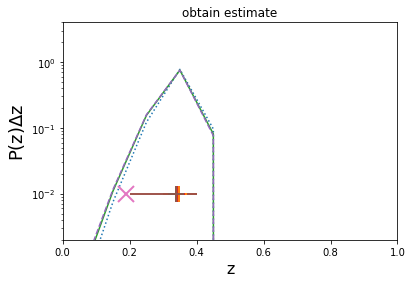

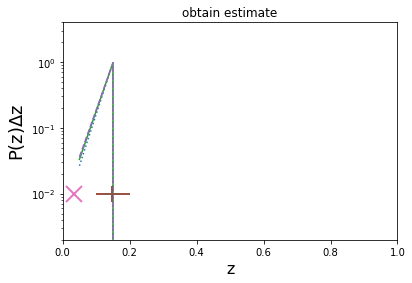

In [24]:
n = "FRB121102"
for n in ["FRB121102", "FRB180916"]:
    PlotRedshiftEstimate( repeaters[n][0]-repeaters[n][1], redshift_host=repeaters[n][-2], scenario={'IGM':'primordial'} )

In [45]:
DMs = []
for FRB in repeaters:
    DMs.append(repeaters[FRB][0]-repeaters[FRB][1])

In [46]:
print( 'DMs =', DMs)

DMs = [330, 1300, 421, 193, 521, 63, 374, 379, 508, 102, 346, 262, 370, 158, 150, 608, 1239, 257, 340]
